In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
sort_by_target(mnist) # fetch_openml() returns an unsorted dataset

In [4]:
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

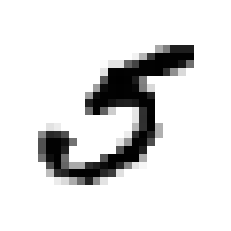

In [5]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

plt.show()

In [6]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [7]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [9]:
sgd_clf.predict([some_digit])

array([ True])

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9526 , 0.9683 , 0.94825])

In [11]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [12]:
y_train_5.size

60000

In [13]:
y_train_pred.size

60000

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[52856,  1723],
       [  894,  4527]])

In [15]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.72432

In [16]:
recall_score(y_train_5, y_train_pred)

0.8350857775318207

In [17]:
from sklearn.metrics import f1_score

In [18]:
f1_score(y_train_5, y_train_pred)

0.7757690000856824

In [19]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [20]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

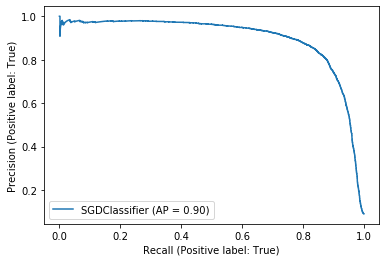

In [21]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(sgd_clf, X_train, y_train_5, response_method='decision_function')

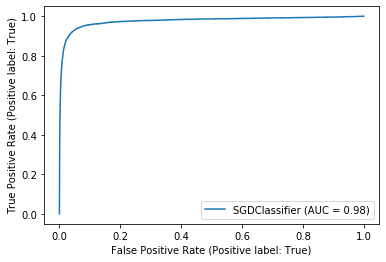

In [22]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

RocCurveDisplay.from_estimator(sgd_clf, X_train, y_train_5, response_method='decision_function')

In [23]:
roc_auc_score(y_train_5, y_scores)

0.966033358278854

In [24]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [25]:
y_probas_forest[:,1]

array([0.  , 0.02, 0.07, ..., 0.06, 0.  , 0.  ])

In [26]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

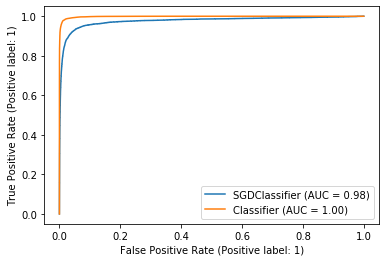

In [27]:
axis = plt.subplots(1,1)
RocCurveDisplay.from_estimator(sgd_clf, X_train, y_train_5, ax=axis[1])
RocCurveDisplay.from_predictions(y_train_5, y_probas_forest[:,1], ax=axis[1])

In [28]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=int8)

In [29]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -7168.0740178 , -22855.50591621,  -6733.65912022,
          -419.48549715, -19811.20307167,  -1571.06986338,
        -16523.87088978, -23251.34936305, -14500.60122847,
        -15689.16406278]])

In [30]:
some_digit_scores.argmax()

3

In [31]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5], dtype=int8)

In [32]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5], dtype=int8)

In [33]:
forest_clf.predict_proba([some_digit])

array([[0.04, 0.  , 0.  , 0.09, 0.03, 0.82, 0.  , 0.01, 0.  , 0.01]])

SGD é muito lento!!!